<a href="https://colab.research.google.com/github/davidatorres/TIM8515/blob/main/TorresDTIM8515_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Detection using Multivariate Analysis




In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


## Data Setup

In [21]:
# Load data
url = 'https://ban5013st.blob.core.windows.net/web/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
# Preview data
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Describe data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Background

**Ejection Fraction**

The ejection fraction is an important indicator of how well your heart is functioning. A normal ejection fraction in a healthy heart is typically between 50% to 70%. This means that with each heartbeat, 50% to 70% of the blood in your left ventricle is pumped out to your body.

There are different types of ejection fractions that can be measured:

* Left ventricular ejection fraction (LVEF): This measures the amount of oxygen-rich blood pumped out of the left ventricle to most of the body's organs with each contraction. LVEF helps determine the severity of dysfunction on the left side of the heart.

* Right ventricular ejection fraction (RVEF): This measures the amount of oxygen-poor blood pumped out of the right side of the heart to the lungs for oxygen. It is important if you have right-sided heart failure, although this condition is less common than left-sided heart failure.

An ejection fraction outside of the normal range could indicate various conditions. For example, a mid-range ejection fraction of 40% to 49% means the heart's pumping ability is slightly below normal, while an ejection fraction of 39% or less indicates heart failure with reduced ejection fraction (HFrEF), where the pumping ability is significantly below normal and may lead to severe complications.

**Serum Creatinine**

Serum creatinine is a blood test used to measure kidney function. Normal serum creatinine levels can vary depending on factors such as age, sex, and muscle mass. In general, the normal range for serum creatinine is approximately 0.6 to 1.3 milligrams per deciliter (mg/dL) for adult males and 0.5 to 1.1 mg/dL for adult females .

Reference

Ejection Fraction: What It Is, Types and Normal Range. Cleveland Clinic. Retrieved Mar 2, 2024, from https://my.clevelandclinic.org/health/articles/16950-ejection-fraction

In [5]:
# # Add indicator of low ejection_fraction
# df['ejection_fraction_less_than_40'] = df['ejection_fraction'] < 40
# df[['ejection_fraction', 'ejection_fraction_less_than_40']].head()

## Exploratory Data Analysis

### Research Questions

* What patterns exist in the patient data?
* Which variables are most predictive of mortality?
* Which type of model is the better choice for predicting mortality?

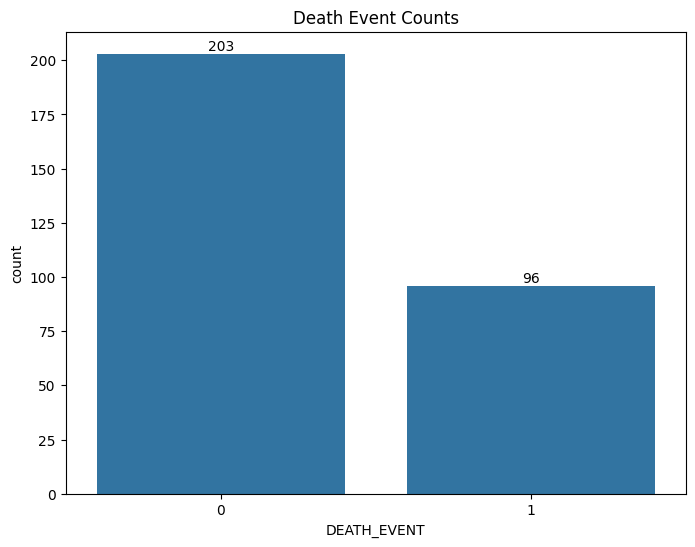

In [6]:
plt.figure(figsize=(8,6))
plt.title("Death Event Counts")
ax = sns.countplot(x='DEATH_EVENT', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

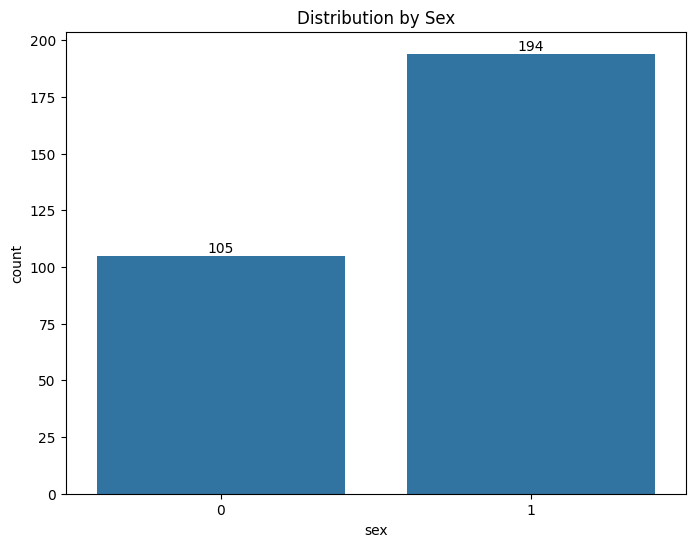

In [7]:
plt.figure(figsize=(8,6))
plt.title("Distribution by Sex")
ax = sns.countplot(x='sex', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

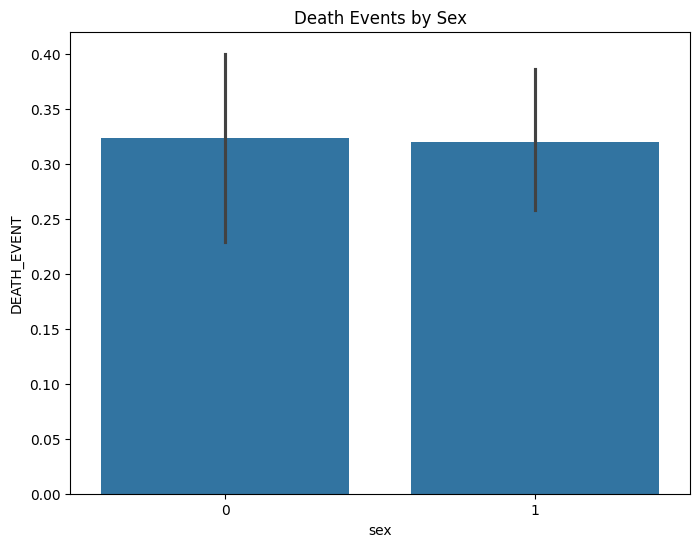

In [8]:
plt.figure(figsize=(8,6))
plt.title("Death Events by Sex")
ax = sns.barplot(x='sex', y='DEATH_EVENT', data=df)
plt.show()

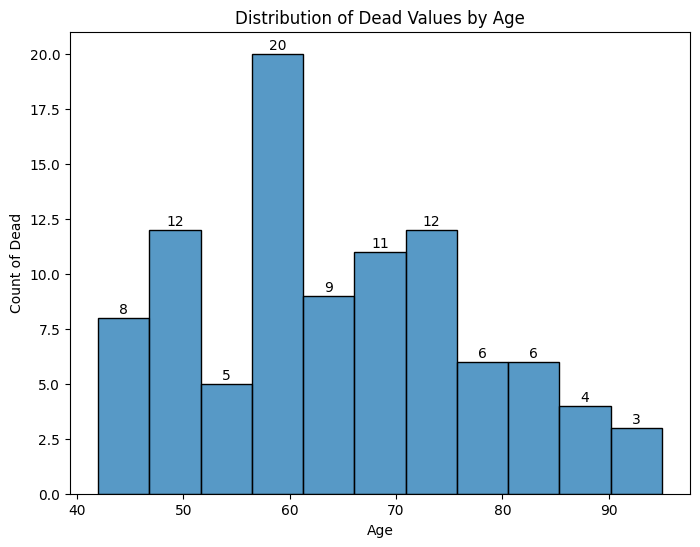

In [9]:
mort_df = df[df['DEATH_EVENT'] == 1]
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Count of Dead')
plt.title('Distribution of Dead Values by Age')
graph = sns.histplot(data=mort_df, x='age', binwidth=5)
for p in graph.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha="center")
plt.show()

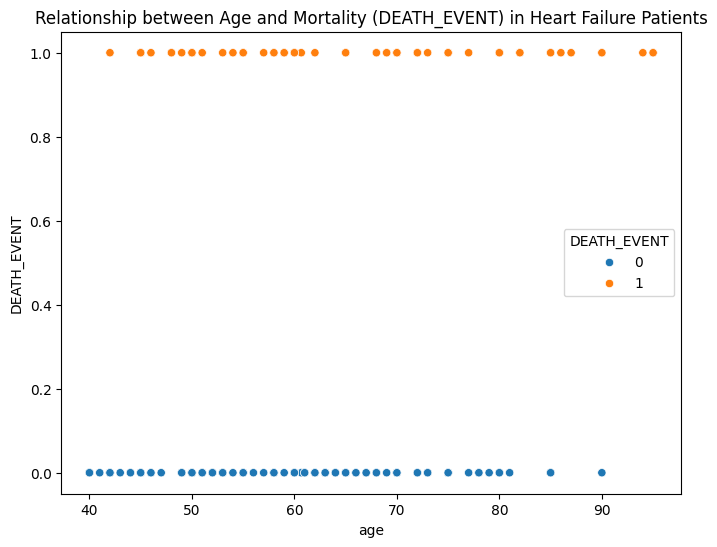

In [10]:
plt.figure(figsize=(8,6))
plt.title("Relationship between Age and Mortality (DEATH_EVENT) in Heart Failure Patients")
ax = sns.scatterplot(x="age", y="DEATH_EVENT", hue="DEATH_EVENT", data=df)
plt.show()

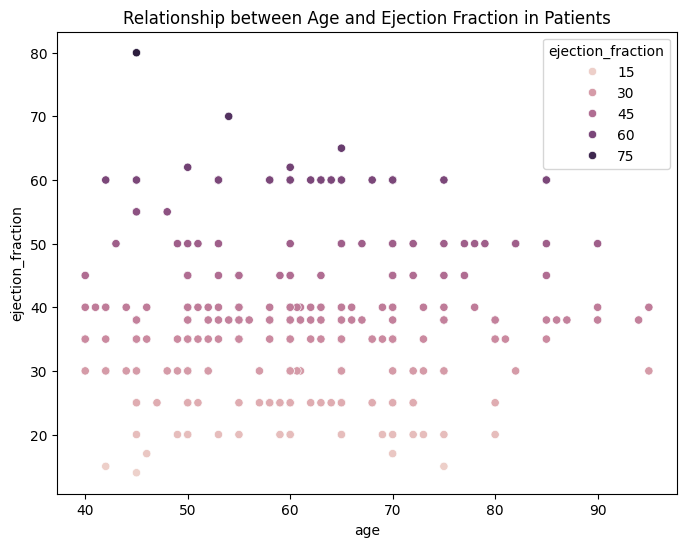

In [11]:
plt.figure(figsize=(8,6))
plt.title("Relationship between Age and Ejection Fraction in Patients")
ax = sns.scatterplot(x="age", y="ejection_fraction", hue="ejection_fraction", data=df)
plt.show()

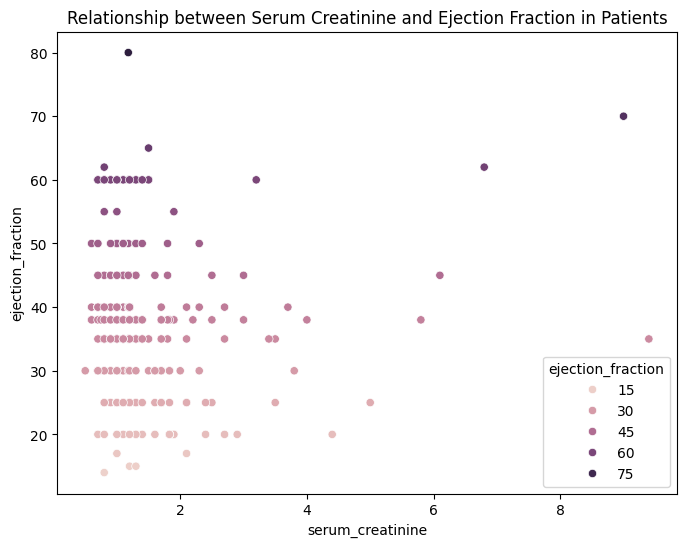

In [12]:
plt.figure(figsize=(8,6))
plt.title("Relationship between Serum Creatinine and Ejection Fraction in Patients")
ax = sns.scatterplot(x="serum_creatinine", y="ejection_fraction", hue="ejection_fraction", data=df)
plt.show()

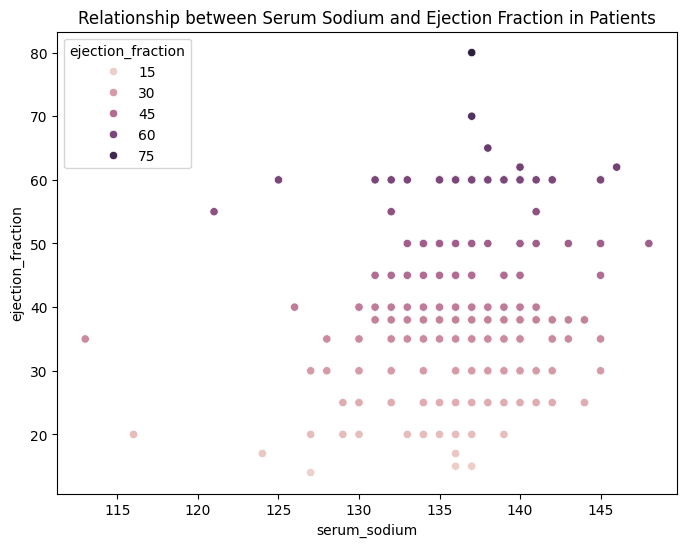

In [13]:
plt.figure(figsize=(8,6))
plt.title("Relationship between Serum Sodium and Ejection Fraction in Patients")
ax = sns.scatterplot(x="serum_sodium", y="ejection_fraction", hue="ejection_fraction", data=df)
plt.show()

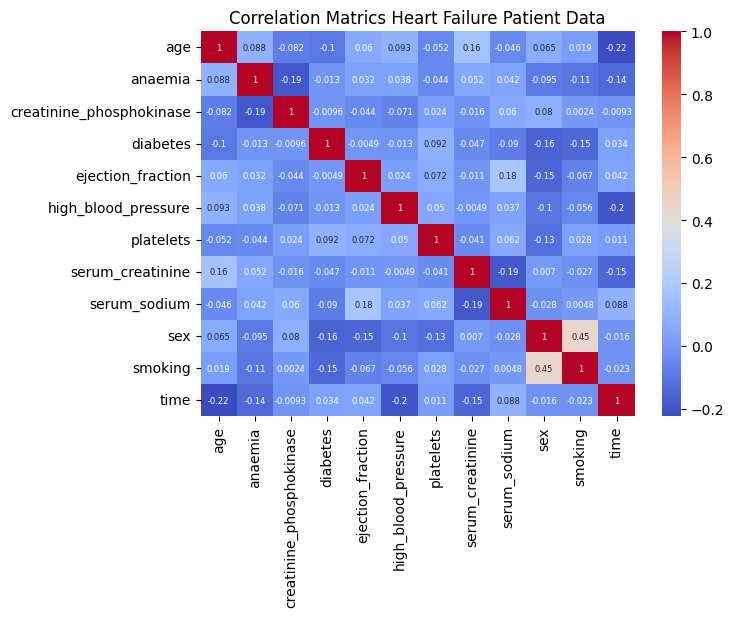

In [14]:
# Correlation Heatmap
df1 = df.drop(['DEATH_EVENT'], axis=1)
corr = df1.corr()
plt.figure(figsize=(7,5))
plt.title("Correlation Matrics Heart Failure Patient Data")
ax = sns.heatmap(corr,
                 cmap="coolwarm",
                 annot=True, annot_kws={"size": 6})
plt.show()

Serum creatinine is a blood test used to measure kidney function. Normal serum creatinine levels can vary depending on factors such as age, sex, and muscle mass. In general, the normal range for serum creatinine is approximately 0.6 to 1.3 milligrams per deciliter (mg/dL) for adult males and 0.5 to 1.1 mg/dL for adult females .

In [15]:
X = df[['age', 'serum_creatinine']] # 2 variables selected for multiple regression.
Y = df['DEATH_EVENT'] # Single outcome variable

# with sklearn
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# Make a predictions with sklearn
a_1 = 30
s_1 = 7.0
print (f'\nPrediction of Mortality Age=30, Creatinine=7.0:, Prediction: {regr.predict([[a_1 ,s_1]])[0]*100:.2f}% \n')

a_2 = 60
s_2 = .8
print (f'\nPredicted of Mortality Age=60, Creatinine=0.8:, Prediction: {regr.predict([[a_2 ,s_2]])[0]*100:.2f}% \n')

# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

Intercept: 
 -0.35076368025760063
Coefficients: 
 [0.00834555 0.11775874]

Prediction of Mortality Age=30, Creatinine=7.0:, Prediction: 72.39% 


Predicted of Mortality Age=60, Creatinine=0.8:, Prediction: 24.42% 

                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     22.22
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.03e-09
Time:                        16:18:24   Log-Likelihood:                -175.62
No. Observations:                 299   AIC:                             357.2
Df Residuals:                     296   BIC:                             368.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                     

Ejection fraction is an important indicator of how well your heart is functioning. A normal ejection fraction in a healthy heart is typically between 50% to 70%. This means that with each heartbeat, 50% to 70% of the blood in your left ventricle is pumped out of the body.

An ejection fraction outside of the normal range could indicate various conditions. For example, a mid-range ejection fraction of 40% to 49% means the heart's pumping ability is slightly below normal, while an ejection fraction of 39% or less indicates heart failure with reduced ejection fraction (HFrEF), where the pumping ability is significantly below normal and may lead to severe complications.

In [16]:
X = df[['age','ejection_fraction']] # 2 variables selected for multiple regression.
Y = df['DEATH_EVENT'] # Single outcome variable

# with sklearn
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# Make a predictions with sklearn
a_1 = 65
s_1 = 20
print (f'\nPrediction of Mortality Age=65, Ejection Fraction=20%:, Prediction: {regr.predict([[a_1 ,s_1]])[0]*100:.2f}% \n')

a_2 = 65
s_2 = 60
print (f'\nPredicted of Mortality Age=65, Ejection Fraction=60%:, Prediction: {regr.predict([[a_2 ,s_2]])[0]*100:.2f}% \n')

# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

Intercept: 
 0.1019730195366027
Coefficients: 
 [ 0.01064904 -0.01125747]

Prediction of Mortality Age=65, Ejection Fraction=20%:, Prediction: 56.90% 


Predicted of Mortality Age=65, Ejection Fraction=60%:, Prediction: 11.87% 

                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     25.15
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           8.18e-11
Time:                        16:18:25   Log-Likelihood:                -173.06
No. Observations:                 299   AIC:                             352.1
Df Residuals:                     296   BIC:                             363.2
Df Model:                           2                                         
Covariance Type:            nonrobust                       

When using age and ejection fraction as variables in predicting mortality the older the individual and the lower the ejection fraction the higher the mortality rate.

In [23]:
X = df[['serum_creatinine','ejection_fraction']] # 2 variables selected for multiple regression.
Y = df['DEATH_EVENT'] # Single outcome variable

# with sklearn
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# Make a predictions with sklearn
a_1 = 5.0
s_1 = 20
print (f'\nPrediction of Mortality Creatinine=5.0, Ejection Fraction=20%:, Prediction: {regr.predict([[a_1 ,s_1]])[0]*100:.2f}% \n')

a_2 = 0.8
s_2 = 60
print (f'\nPredicted of Mortality Creatinine=0.8, Ejection Fraction=60%:, Prediction: {regr.predict([[a_2 ,s_2]])[0]*100:.2f}% \n')

# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)


Intercept: 
 0.5368006160112655
Coefficients: 
 [ 0.1316783  -0.01048414]

Prediction of Mortality Creatinine=5.0, Ejection Fraction=20%:, Prediction: 98.55% 


Predicted of Mortality Creatinine=0.8, Ejection Fraction=60%:, Prediction: 1.31% 

                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     27.56
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.06e-11
Time:                        16:22:48   Log-Likelihood:                -170.99
No. Observations:                 299   AIC:                             348.0
Df Residuals:                     296   BIC:                             359.1
Df Model:                           2                                         
Covariance Type:            nonrobust        

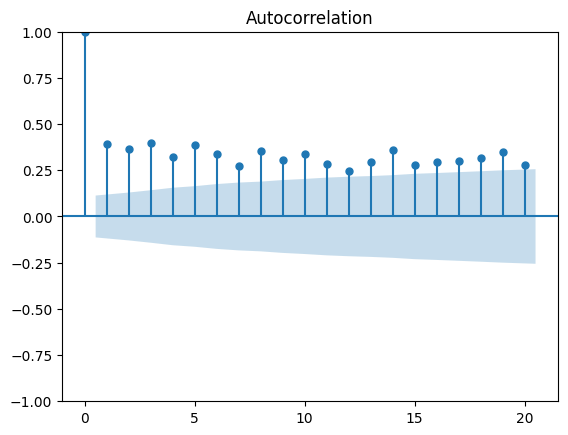

In [27]:
# Obtain the residuals
residuals = model.resid

# Check for autocorrelation
acf = sm.tsa.stattools.acf(residuals)
# pacf = sm.tsa.stattools.pacf(residuals)

# Plot autocorrelation function (ACF)
sm.graphics.tsa.plot_acf(residuals, lags=20)
plt.show()
# Plot partial autocorrelation function (PACF)
# sm.graphics.tsa.plot_pacf(residuals, lags=20)

# Multivariate Logistic Regression Analysis

Create training, validation and testing dataset with a 70%, 20%, and 10% split without resampling.

In [ ]:
# Calculate the number of rows for each split
train_size = int(0.7 * len(df))
val_size = int(0.2 * len(df))
test_size = len(df) - train_size - val_size

# Split the dataframe into train, validation, and test dataframes
df_train = df[:train_size]
df_val = df[train_size:train_size+val_size]
df_test = df[train_size+val_size:]

# Print the shapes of the resulting dataframes
print("Train dataframe shape:", df_train.shape)
print("Validation dataframe shape:", df_val.shape)
print("Test dataframe shape:", df_test.shape)

In [ ]:
# Identify the label (outcome variable) in each dataset and convert to arrays.
train_label = np.asarray(df_train['DEATH_EVENT'])
train_data = np.asarray(df_train.drop('DEATH_EVENT',1))
val_label = np.asarray(df_val['DEATH_EVENT'])
val_data = np.asarray(df_val.drop('DEATH_EVENT',1))
test_label= np.asarray(df_test['DEATH_EVENT'])
test_data = np.asarray(df_test.drop('DEATH_EVENT',1))

In [ ]:
# Normalize the data inputs to ensure all values fall between 0 and 1.
means = np.mean(train_data, axis=0)
stds = np.std(train_data, axis=0)
train_data = (train_data - means)/stds
val_data = (val_data - means)/stds

In [ ]:
# Logistic Regression
# Fit model
log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)

# Check accuracy of the model using train data.
accuracy = log_reg.score(train_data, train_label)
print(f"Training Accuracy = {accuracy * 100:.2f}%\n")

# Check accuracy of the model using validation data.
accuracy = log_reg.score(val_data, val_label)
print(f"Validation Accuracy = {accuracy * 100:.2f}%\n")

# Check accuracy of the model using test data.
accuracy = log_reg.score(test_data, test_label)
print(f"Holdout Test Accuracy = {accuracy * 100:.2f}%\n")

# Print importance
importance=log_reg.coef_[0]
cols=[]
print('Variable Importance')
for i,v in enumerate(importance):
  cols.append(df_train.columns[[i]][0])
  print(f'Score: {v:+.5f}, Feature: {df_train.columns[[i]][0]}')

# create bar plot
print('\n\n')
plt.figure(figsize=(8,6))
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance')
sns.barplot(x=importance, y=cols)
plt.show()


Optimization terminated successfully.
         Current function value: 0.542343
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            2
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                  0.1359
Time:                        18:08:01   Log-Likelihood:                -162.16
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 8.308e-12
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3777      0.543      0.695      0.487      -0.687       1.443
serum_cr

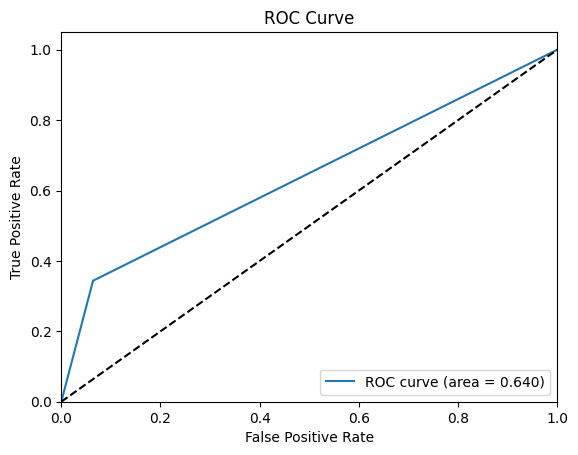

In [27]:
# Keep only serum creatinine and ejection fraction features
df = df[['serum_creatinine', 'ejection_fraction', 'DEATH_EVENT']]

# Logistic regression
logit = smf.logit(formula='DEATH_EVENT ~ serum_creatinine + ejection_fraction', data=df).fit()

# Print model summary
print(logit.summary())

# Make predictions on training set
y_pred_proba = logit.predict(df)
y_pred = (y_pred_proba >= 0.5).astype(int)

fpr, tpr, thresholds = roc_curve(df.DEATH_EVENT, y_pred)
roc_auc = roc_auc_score(df.DEATH_EVENT, y_pred)

# Model evaluation metrics
print(f'\nAccuracy: {accuracy_score(df.DEATH_EVENT, y_pred) * 100:.2f}%')
print(f'Precision: {precision_score(df.DEATH_EVENT, y_pred) * 100:.2f}%')
print(f'Recall: {recall_score(df.DEATH_EVENT, y_pred) * 100:.2f}%')
print(f'ROC AUC: {roc_auc_score(df.DEATH_EVENT, y_pred):.4f}%')

# Plot ROC Curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Based on the Variable Importance histogram, age, ejection fraction, and serum creatinine high the highest impact on predicting mortality.

The logistic regression model was 86.5% accurate based on the validation data and 100% accurate in predicting a result on the holdout test data.
